In [39]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score



In [44]:
# Load dataset
file = "dataset_file.csv"
names = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','res']
# names = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'Air_quality']
dataset = read_csv(file, names= names)

array = dataset.values
X = array[:, 0:16]
y = array[:, 17]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size = 0.20, random_state=1, shuffle = True)




In [45]:
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('NNMLP', MLPClassifier(alpha=1,max_iter=1000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


AB: 0.958929 (0.062907)
optimized_parameters {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}

SGD: 0.917857 (0.141105)
optimized_parameters {'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

NNMLP: 0.841071 (0.190403)
optimized_parameters {'activation': 'relu', 'alpha': 1, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, '

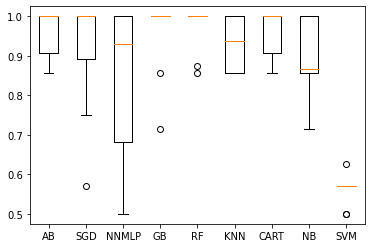

In [46]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
    optimized_parameters = model.get_params(deep=True)
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' %(name, cv_results.mean(), cv_results.std()))
    print('optimized_parameters',optimized_parameters)
    print()
pyplot.boxplot(results, labels=names)
pyplot.show()

In [47]:
# print()
# print('Prediction Step')
# for name, model in models:
#     print()
#     print('name= ',name)
#     model.fit(X_train, Y_train)
#     predictions = model.predict(X_validation)
#     # evaluate predictions
#     print(accuracy_score(Y_validation, predictions))
#     print(confusion_matrix(Y_validation, predictions))
#     print(classification_report(Y_validation, predictions))

print()
print('Prediction step')
# Make predictions on validation dataset
for name, model in models:
	print()
	print('name = ',name)
	model.fit(X_train, Y_train)
	# optimized_parameters = model.get_params(deep=True)
	predictions = model.predict(X_validation)
	# Evaluate predictions
	print(accuracy_score(Y_validation, predictions))
	print(confusion_matrix(Y_validation, predictions))
	print(classification_report(Y_validation, predictions))
	# print('optimized_parameters',optimized_parameters)    


Prediction step

name =  AB
0.8947368421052632
[[ 7  1]
 [ 1 10]]
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88         8
         1.0       0.91      0.91      0.91        11

    accuracy                           0.89        19
   macro avg       0.89      0.89      0.89        19
weighted avg       0.89      0.89      0.89        19


name =  SGD
0.7894736842105263
[[6 2]
 [2 9]]
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         8
         1.0       0.82      0.82      0.82        11

    accuracy                           0.79        19
   macro avg       0.78      0.78      0.78        19
weighted avg       0.79      0.79      0.79        19


name =  NNMLP
0.8947368421052632
[[ 6  2]
 [ 0 11]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         8
         1.0       0.85      1.00      0.92        11

    accuracy   